# $$Cluster~Não~Hierárquico:K-Means$$


### $$CONCEITO:$$

Técnica Não-Supervisionada (Diagnostica)


Os clusters são definidos pela distância das variáveis X


**Objetivo:** Criar Grupos de observações através do cálculo da distância entre os dados, que sejam próximos entre si e diferente entre grupos, dentro do Grupo a variabilidade dos dados dever ser mínima e entre grupo deve ser máxima



A definição do número de grupos se dá através da variabilidade entre eles, quanto mais grupos, menor a variabilidade

-----------------------------------------------------------------------------------------------------------------------

### $$Distâncias(Métricas):$$


**Precisamos saber qual método usar para calcular a distância entre os dados, e as principais métricas são:**



**Euclidiana:** É a distância em linha reta entre dois pontos de dados no espaço euclidiano. Também é chamada de norma L2 ou distância L2.



**Minkowsky:** Forma generalizada da distância euclidiana e da distância de Manhattan, é normalmente usada com 'p' sendo 1 ou 2, que corresponde à distância de Manhattan e à distância euclidiana, respetivamente.



**Manhattan:** É a soma das diferenças absolutas das suas coordenadas cartesianas, também é chamada com nomes diferentes, distância L1, norma L1, distância da cobra, distância do quarteirão da cidade, etc 



**Hamming:** A distância de Hamming entre duas sequências de comprimento igual é o número de posições nas quais os símbolos correspondentes são diferentes. Os dados usados podem ser strings contendo letras, bits ou dígitos decimais, etc.

-----------------------------------------------------------------------------------------------------------------------

### $$Método~De~Agrupamento:K-Means$$

A ideia do algoritmo K-Means é fornecer uma classificação em forma de grupos de acordo com a distância dos dados. 


O usuário deve fornecer ao algoritmo a quantidade de classes que ele deseja. Este número de classes que deve ser passada para o algoritmo é chamado de k


O algoritmo faz uma comparação entre cada dado por meio da distância, após o cálculo das distâncias o algoritmo calcula centroides para cada um dos grupos, conforme o algoritmo vai iterando, o valor de cada centroide é redefinido pela média dos valores dentro dos grupos.


Uma vez que cada cluster formado é mutuamente exclusivo, nunca pode haver uma relação hierárquica entre os clusters



-----------------------------------------------------------------------------------------------------------------------

### $$Tipo~De~Distribuição:$$


**Variáveis Explicativas:** Somente variáveis Quantitativas, porém para interpretação dos Clusters podemos adicionar as variáveis categóricas após ter concluído o processo de clusterização



**OBS1: Não usar Variáveis com Alta Correlação**



**OBS2: Padronizar os dados**

-----------------------------------------------------------------------------------------------------------------------

### $$Técnicas~Para~Escolha~Do~Número~De~Clusters:$$



**Coeficiente R²:** Definir o número de grupos quando o R² não aumentar consideravelmente, ou seja, quanto maior o R² melhor o agrupamento.


- **Soma de Quadrados Total(SST)** = **SSR**(variabilidade dentro do grupo) **+** **SSB** (variabilidade entre os grupos)


- **R²** = **SSB** **/** **SST** 


**CCC (Cubic Cluster Critirion):**  Buscar o maior valor do R² antes da queda brusca 



**Elbow:** Soma das variâncias VS Número de Clusters = Quanto maior o número de clusters menor a variância dentro do grupo.



**Silhoutte:** Verificar se o dado está no grupo certo, calculando a distância media do dado no seu grupo e comparando o valor com outro grupo, se a distância do seu grupo estiver menor então é o grupo certo, quanto maior o S mais correto está a divisão dos dados nos grupos.



__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$

## $$Encontrar ~os~ lanches~ menos~ caloricos~ do~ McDonald's~ com~ base ~nas~ informações$$$$~ nutricionais('Carboidratos'~ ,'Gorduras.Totais' ~e ~'Colesterol')$$$$ para~ uma~ campanha ~de~ marketing~usando~o~modelo~K-Mean$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
import pandas as pd
import sklearn.datasets  as dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")
%matplotlib inline 

# Base de dados

In [2]:
# Carregando o dataset
dados = pd.read_csv('MCDONALDS.csv',encoding='latin1',sep=',')
dados = dados.set_index('Lanche')


dados = dados[['Carboidratos','Gorduras.Totais','Colesterol']]
print(f'Shape da base de dados: {dados.shape}')
dados

Shape da base de dados: (25, 3)


,Carboidratos,Gorduras.Totais,Colesterol
Lanche,,,
Big Mac,41,27.0,54
Big Tasty,45,55.0,104
Quarterao,36,32.0,86
Mcnifico Bacon,38,37.0,95
Cheddar McMelt,33,29.0,81
McFish,38,16.0,43
McChicken,40,25.0,49
McChicken Jr,33,17.0,11
Chicken Classic Crispy,52,20.0,33


**Os dados estão em escalas diferentes , isso vai interferir na hora da formação dos clusters , precisamos padronizar os dados**

# Padronizar os dados

In [3]:
#Padronização
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(dados)
dados_padro = scaler.transform(dados)
dados_padro = pd.DataFrame(dados_padro,columns=dados.columns)
dados_padro.index = dados.index
dados_padro.head(5)

,Carboidratos,Gorduras.Totais,Colesterol
Lanche,,,
Big Mac,-0.039432,0.231040,-0.207390
Big Tasty,0.398701,2.512109,1.232820
Quarterao,-0.587098,0.638373,0.714345
Mcnifico Bacon,-0.368032,1.045707,0.973582
Cheddar McMelt,-0.915698,0.393973,0.570323


**Todos os dados estão na mesma escala**

# Técnicas para escolha do número de clusters:

# Metodo Elbow 

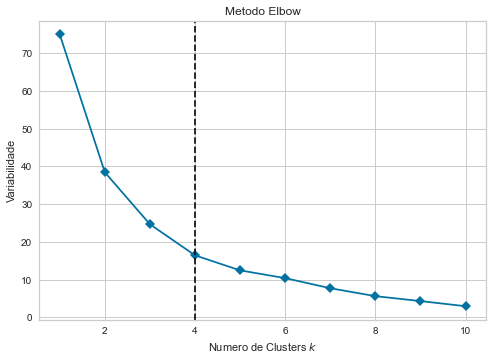

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11),timings=False)
visualizer.fit(dados_padro)   
plt.xlabel('Numero de Clusters $k$')
plt.ylabel('Variabilidade')
plt.title('Metodo Elbow')
plt.show()

**Veja que quanto maior o número de clusters, menor o valor da variabilidade dos dados, o Método Elbow neste conjunto de dados indica que 4 clusters é o ideal, porém podemos utilizar outros valores e fazer as comparações**

## Silhouette

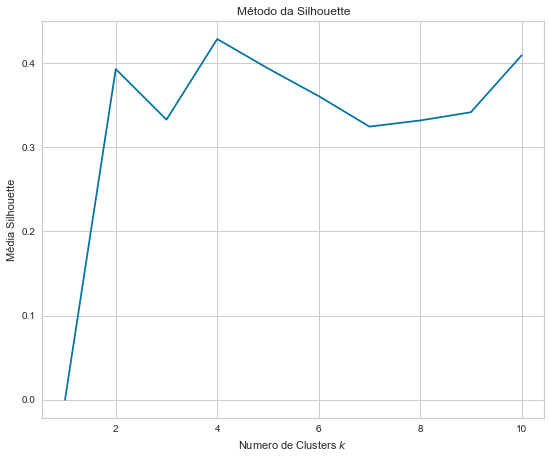

In [5]:
from sklearn.metrics import silhouette_score

scores = [0]
for i in range(2,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(dados_padro)
    score = silhouette_score(dados_padro, fitx.labels_)
    scores.append(score)
    
plt.figure(figsize=(9,7.3))
plt.plot(range(1,11), np.array(scores), 'bx-')
plt.xlabel('Numero de Clusters $k$')
plt.ylabel('Média Silhouette')
plt.title('Método da Silhouette')
plt.show()

**O Método da Silhouette indica que o número de clusters igual a 4 é o ideal para essa base de dados, porém podemos utilizar outros valores e fazer as comparações**

### Conclusão 1: 

**Segundo a análise feita com os métodos Elbow e Silhouette, 4 clusters é o número ideal para separar os dados, para que fiquem o mais heterogêneos possível entre os grupos formados**

# Visualização gráfica dos dados

## PCA

- Para dados que contém mais de 2 variáveis em seu dataset, precisamos transforma-los em 2 componentes para conseguir visualizar no gráfico

In [6]:
from sklearn.decomposition import PCA
pca_c = PCA(n_components=2).fit_transform(dados_padro)
pca = pd.DataFrame(pca_c,columns=['x','y'])
pca.index = dados.index
pca

,x,y
Lanche,,
Big Mac,-0.003864,-0.026685
Big Tasty,2.489335,-0.953181
Quarterao,0.526206,-0.992754
Mcnifico Bacon,1.044100,-1.037822
Cheddar McMelt,0.122436,-1.139921
McFish,-0.911983,0.104490
McChicken,-0.246548,-0.011611
McChicken Jr,-1.697871,-0.029676
Chicken Classic Crispy,-0.108670,1.432565


**Note que as 3 variáveis do dataset, foram transformadas em 2 componentes**

## Plot dos dados com 2 componentes

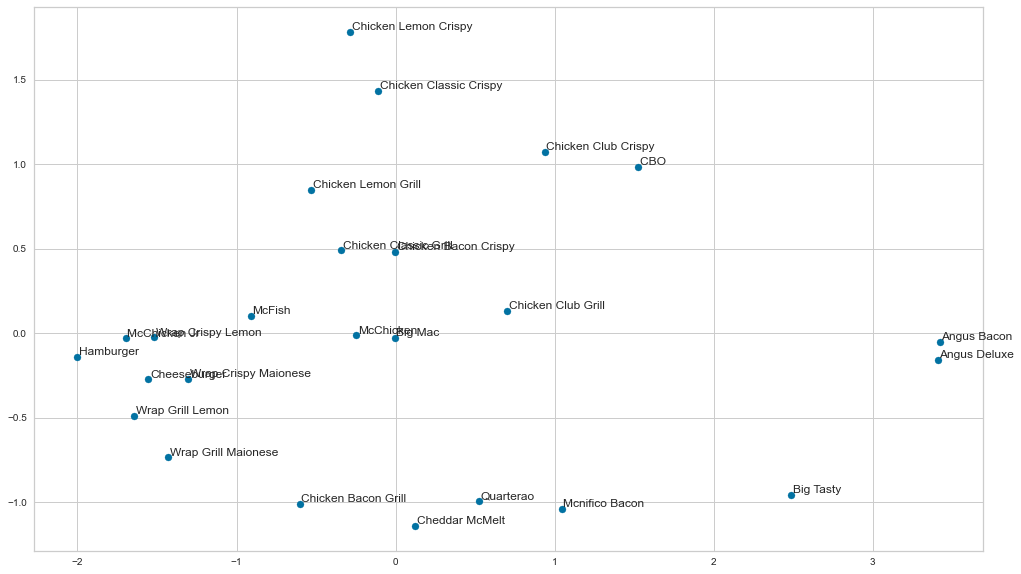

In [7]:
#Plotar os 2 Principais componentes dos Auto Vetores
fig, ax = plt.subplots(1,1, figsize=(17,10))


ax.scatter(pca.iloc[:,0],pca.iloc[:,1]);

# Add as labels
for index, series in pca.iterrows():
    ax.text(series[0]+0.01,series[1]+0.01, index)

**Mesmo sem o uso dos clusters podemos notar uma grande diferença entre os lanches ANGUS dos demais**

# Algoritimo de Clusterização Não Hierarquica

## Modelo K-Means

In [8]:
# Criar os modelos K-Means de 2 a 5 clusters
fitted_2 = KMeans(n_clusters=2,  random_state=109).fit(pca)
fitted_3 = KMeans(n_clusters=3,  random_state=109).fit(pca)
fitted_4 = KMeans(n_clusters=4,  random_state=109).fit(pca)
fitted_5 = KMeans(n_clusters=5,  random_state=109).fit(pca)


**4 modelos k-means criados, com 2 a 5 clusters**

## Plotar os dados e os centroids

- Vamos visualizar graficamente como os dados foram agrupados 

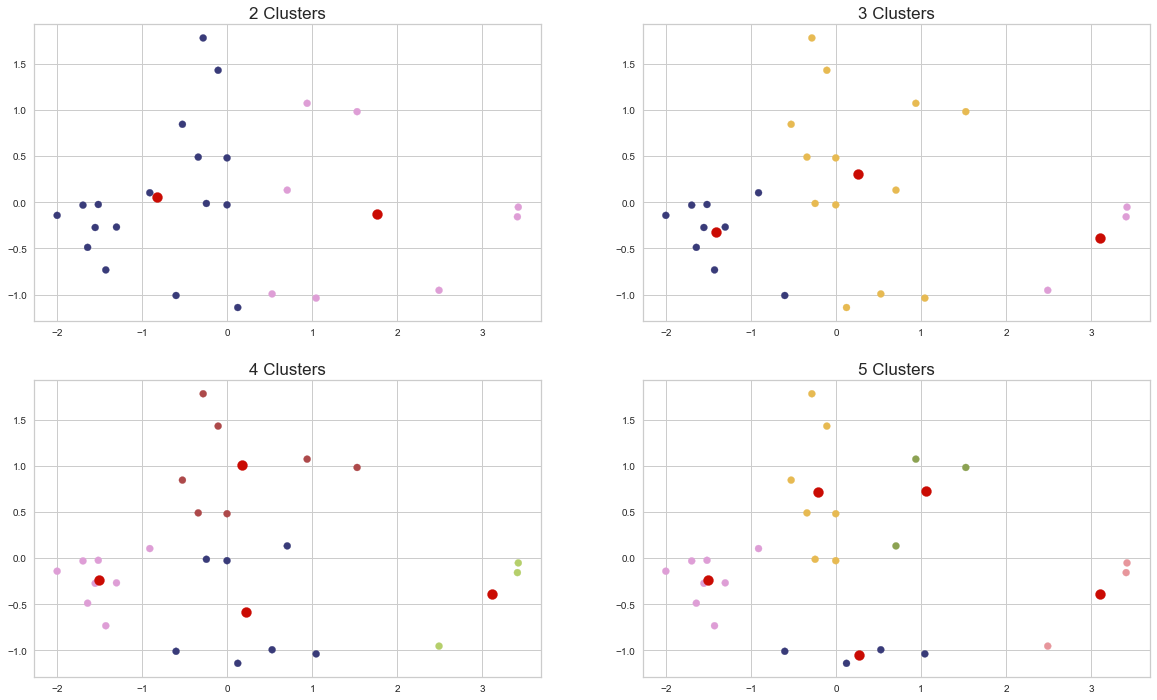

In [22]:
#Plotar os centroids
fig,axes =plt.subplots(nrows=2,ncols=2,figsize=(20,12))
axes =axes.ravel()

axes[0].scatter(x=pca.iloc[:,0],y=pca.iloc[:,1],c=fitted_2.labels_,cmap='tab20b');
axes[0].scatter(fitted_2.cluster_centers_[:,0],fitted_2.cluster_centers_[:,1], c='r', marker='o', s=100);
axes[0].set_title('2 Clusters', fontsize=17)

axes[1].scatter(x=pca.iloc[:,0],y=pca.iloc[:,1],c=fitted_3.labels_,cmap='tab20b');
axes[1].scatter(fitted_3.cluster_centers_[:,0],fitted_3.cluster_centers_[:,1], c='r', marker='o', s=100); 
axes[1].set_title('3 Clusters', fontsize=17)

axes[2].scatter(x=pca.iloc[:,0],y=pca.iloc[:,1],c=fitted_4.labels_,cmap='tab20b');
axes[2].scatter(fitted_4.cluster_centers_[:,0],fitted_4.cluster_centers_[:,1], c='r', marker='o', s=100); 
axes[2].set_title('4 Clusters', fontsize=17)

axes[3].scatter(x=pca.iloc[:,0],y=pca.iloc[:,1],c=fitted_5.labels_,cmap='tab20b');
axes[3].scatter(fitted_5.cluster_centers_[:,0],fitted_5.cluster_centers_[:,1], c='r', marker='o', s=100); 
axes[3].set_title('5 Clusters', fontsize=17);


**Observe que os pontos em vermelhos são os centroides de cada grupo, com essa base de dados fica difícil graficamente definir qual número de K é o melhor, só podemos tirar a conclusão que todos parecem ter coerência na definição dos grupos, visualizar de forma descritiva os dados, pode ser uma alternativa para definir o melhor número de clusters**

# Análise Descritiva

### 2 Clusters 

In [23]:
dados2 = dados.copy()
dados2['2_clusters'] = fitted_2.labels_ #Unir o dataframe original com os clusters
analise_2 = dados2.groupby('2_clusters')[dados2.columns].mean() #Analise dos clusters
analise_2 = analise_2.drop('2_clusters',axis=1)
analise_2['N_Dados'] = dados2['2_clusters'].value_counts()
analise_2

,Carboidratos,Gorduras.Totais,Colesterol,N_Dados
2_clusters,,,,
0,38.0,17.535294,43.470588,17
1,48.5,38.250000,98.875000,8


**O Cluster de número 0 são os lanches que tem menos calorias em comparação aos lanches do cluster 1**

### 3 Clusters 

In [24]:
dados3 = dados.copy()
dados3['3_clusters'] = fitted_3.labels_  #Unir o dataframe original com os clusters
analise_3 = dados3.groupby('3_clusters')[dados3.columns].mean() #Analise dos clusters
analise_3 = analise_3.drop('3_clusters',axis=1)
analise_3['N_Dados'] = dados3['3_clusters'].value_counts()
analise_3

,Carboidratos,Gorduras.Totais,Colesterol,N_Dados
3_clusters,,,,
0,32.333333,15.144444,35.111111,9
1,45.000000,24.446154,63.538462,13
2,52.666667,50.000000,129.333333,3


**Com 3 clusters diminuímos mais a média das variáveis do cluster 0, conseguimos identificar que o cluster número 2 são os que tem os lanches mais calóricos, seguidos pelos cluster 1 e 0**

### 4 Clusters 

In [25]:
dados4 = dados.copy()
dados4['4_clusters'] = fitted_4.labels_  #Unir o dataframe original com os clusters
analise_4 = dados4.groupby('4_clusters')[dados4.columns].mean() #Analise dos clusters
analise_4 = analise_4.drop('4_clusters',axis=1)
analise_4['N_Dados'] = dados4['4_clusters'].value_counts()
analise_4

,Carboidratos,Gorduras.Totais,Colesterol,N_Dados
4_clusters,,,,
0,37.857143,26.857143,77.285714,7
1,52.666667,50.000000,129.333333,3
2,50.142857,20.828571,52.571429,7
3,32.500000,15.037500,29.125000,8


**Com 4 clusters podemos verificar que o cluster de número 3 é o que representa os lanches com menor poder calórico, em comparação com K = 3, conseguimos diminuir ainda mais a média das variáveis, quando comparamos somente os lanches menos calorias**

### 5 Clusters 

In [26]:
dados5 = dados.copy()
dados5['5_clusters'] = fitted_5.labels_  #Unir o dataframe original com os clusters
analise_5 = dados5.groupby('5_clusters')[dados5.columns].mean() #Analise dos clusters
analise_5 = analise_5.drop('5_clusters',axis=1)
analise_5['N_Dados'] = dados5['5_clusters'].value_counts()
analise_5

,Carboidratos,Gorduras.Totais,Colesterol,N_Dados
5_clusters,,,,
0,34.500000,28.500000,86.250000,4
1,52.000000,29.000000,74.000000,3
2,46.000000,18.971429,48.857143,7
3,52.666667,50.000000,129.333333,3
4,32.500000,15.037500,29.125000,8


**Apesar de ter aumentado o número de clusters repare que a média do cluster 4 não teve diferença com o cluster de número 3 da tabela anterior, onde usamos K = 4**

### Conclusão 2: 

**Independente se usar o número de K = 4 ou 5, vamos ter os mesmos dados no cluster de menor caloria, por isso é tão importante definir o problema de negócio, pois o número de K é apenas uma sugestão para ajudar na decisão**


## Escolher os lanches menos caloricos

In [27]:
#Filtrar os lanches menos caloricos
dados['clusters'] = fitted_5.labels_
dados[dados.clusters ==4]

,Carboidratos,Gorduras.Totais,Colesterol,clusters
Lanche,,,,
McFish,38,16.0,43,4
McChicken Jr,33,17.0,11,4
Cheeseburger,32,14.0,31,4
Hamburger,31,9.3,22,4
Wrap Grill Maionese,29,16.0,42,4
Wrap Crispy Maionese,33,20.0,25,4
Wrap Grill Lemon,30,12.0,38,4
Wrap Crispy Lemon,34,16.0,21,4


**Selecionamos o cluster de número 4 do agrupamento do K = 5, porém poderíamos fazer um filtro maior a partir desse conjunto de dados caso tenha que selecionar um grupo ainda menor de lanches para campanha de marketing**  

## Conclusão:

**Não existe um número correto de agrupamento, tudo vai depender do seu problema de negócio, independente da escolha do número de clusters do método Elbow ou da Silhouette, com a analise descritiva chegamos à conclusão que 4 ou 5 clusters seria o ideal, pois conseguimos ter um grupo com as características semelhantes com menos dados**